## Table of Contents
* [Section A: Libraries list](#Section_1)
* [Section B: Main Dataframe](#Section_2)
* [Section C: Filter Dataframe](#Section_3)
    * [Non Node Filters](#Section_31)
    * [Node Filters](#Section_32)
    * [Numeric Filters](#Section_33)
* [Section D: Subset Dataframe](#Section_4)
* [Section E: KG Set Up](#Section_5) 
    * [Creating Unique Lists](#Section_51)
    * [Coloring nodes based on no. of connections](#Section_52)

## Libraries <a class="anchor" id="Section_1"></a>

In [1]:
#Importing Libraries
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings; 
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly.validators.scatter.marker import SymbolValidator
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


import plotly

## Main Dataframe <a class="anchor" id="Section_2"></a>

### Accern dataset

In [2]:
#Full dataset
data_file = 'columbia_capstone_fall2020_esg.csv'
data = pd.read_csv(data_file, parse_dates = ['crawled_at','harvested_at','published_at'])

In [3]:
#Key variables needed in dataset
data = data[['published_at','entity_name','entity_region','entity_sector','entity_ticker','event_group','event','doc_id','doc_title','doc_source','doc_type','entity_country','entity_relevance','entity_sentiment','event_relevance','doc_sentiment','event_sentiment','signal_id','signal_relevance','signal_sentiment']]

In [4]:
data = data.fillna("None")

In [5]:
data['published_at'] = data['published_at'].dt.date
data['published_at'] =  pd.to_datetime(data['published_at'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554606 entries, 0 to 554605
Data columns (total 20 columns):
published_at        554606 non-null datetime64[ns]
entity_name         554606 non-null object
entity_region       554606 non-null object
entity_sector       554606 non-null object
entity_ticker       554606 non-null object
event_group         554606 non-null object
event               554606 non-null object
doc_id              554606 non-null object
doc_title           554606 non-null object
doc_source          554606 non-null object
doc_type            554606 non-null object
entity_country      554606 non-null object
entity_relevance    554606 non-null float64
entity_sentiment    554606 non-null float64
event_relevance     554606 non-null float64
doc_sentiment       554606 non-null float64
event_sentiment     554606 non-null float64
signal_id           554606 non-null object
signal_relevance    554606 non-null float64
signal_sentiment    554606 non-null float64
dtypes: dateti

In [6]:
data.nunique()

published_at           292
entity_name           7090
entity_region            8
entity_sector           20
entity_ticker         6835
event_group              3
event                   23
doc_id              391180
doc_title           261420
doc_source           31490
doc_type                 2
entity_country          57
entity_relevance      7431
entity_sentiment     59443
event_relevance       1113
doc_sentiment       182314
event_sentiment      38702
signal_id           554606
signal_relevance     19381
signal_sentiment    138004
dtype: int64

## Filter Dataframe<a class="anchor" id="Section_3"></a>

#### Non-Node filters<a class="anchor" id="Section_31"></a>

In [7]:
eg_list = data['event_group'] #['Social','Environment']
region_list = data['entity_region'] #['Americas','Europe'] 
country_list = data['entity_country'] #['','']
doctype_list = data['doc_type'] #['news'] 
source_list = data['doc_source'] #doc_source
#published_at
p_startdate = '2020-01-01' #data['published_at'].min()
p_enddate = data['published_at'].max() #'2020-01-04'

#### Node filters<a class="anchor" id="Section_32"></a>

In [8]:
#OR LISTS (e.g. amazon or apple / data security or water waste)
entity_list = data['entity_name'] #['BOMBARDIER INC-A','Apple Inc']
event_list = data['event'] #['Environment - Water Waste Management - SASB','Environment - Energy Management - SASB']
sector_list = data['entity_sector'] #['','']
doc_list = data['doc_title'] #['']

In [9]:
#AND FILTERS (e.g. these events AND these sectors, etc)
data_filter = data[(data['event_group'].isin(eg_list)) &\
                   (data['entity_region'].isin(region_list)) &\
                  (data['entity_country'].isin(country_list)) &\
                  (data['doc_type'].isin(doctype_list)) &\
                  (data['doc_source'].isin(source_list)) &\
                  (data['published_at'] >= p_startdate) & (data['published_at'] <= p_enddate) &\
                      #node filters
                   (data['event'].isin(event_list)) &\
                  (data['entity_sector'].isin(sector_list)) &\
                   (data['entity_name'].isin(entity_list)) &\
                   (data['doc_title'].isin(doc_list))] 

## Subset dataframe<a class="anchor" id="Section_4"></a>

In [10]:
#Subsetting to data security events only
ds_industrial = data[data["entity_sector"]=="Industrials"]
ds_industrial = ds_industrial[0:2]

#Subsetting to technology industry that do not have data security as event
ds_technology = data.loc[(data["entity_sector"] == "Technology")]
ds_technology = ds_technology[3:5]

In [11]:
#Combining above subsets
temp_data = pd.concat([ds_industrial, ds_technology])

In [12]:
#ensure there is no null values
temp_data.isna().sum()

published_at        0
entity_name         0
entity_region       0
entity_sector       0
entity_ticker       0
event_group         0
event               0
doc_id              0
doc_title           0
doc_source          0
doc_type            0
entity_country      0
entity_relevance    0
entity_sentiment    0
event_relevance     0
doc_sentiment       0
event_sentiment     0
signal_id           0
signal_relevance    0
signal_sentiment    0
dtype: int64

In [131]:
temp_data

,published_at,entity_name,entity_region,entity_sector,entity_ticker,event_group,event,doc_id,doc_title,doc_source,...,signal_id,signal_relevance,signal_sentiment,doc_count,doc_count_per_entity,doc_count_per_event,doc_count_per_sector_x,Avg Entity Sentiment_x,doc_count_per_sector_y,Avg Entity Sentiment_y
0,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca8884ed9470001e1eb00,Print - Bombardiers joint venture wins contrac...,ACCERN: globenewswire.com,...,90f6ebba-71a2-4d8a-8a5f-233a63ca9236,31.875,19.7836,1,2,2,2,10.8120,2,10.8120
1,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca7ef6a72090001b7e687,Bombardiers joint venture wins contract to bui...,ACCERN: globenewswire.com,...,584cb3f0-e440-4fc4-8488-0182d2ffcf3b,28.125,21.0631,1,2,2,2,10.8120,2,10.8120
2,2020-01-01,Apple Inc,Europe,Technology,AAPL,Social,Social - Data Security - SASB,5e87b1a43f5416001d100406,"How To: Jailbreak Any iPhone, iPod Touch or iPad",Gizmodo,...,8676ca33-72ad-4186-b942-67e7be8ee95d,45.000,-44.1990,1,1,2,2,-67.9119,2,-67.9119
3,2020-01-01,INTL BUSINESS MACHINES CORP,Europe,Technology,IBM,Social,Social - Data Security - SASB,5e87b1b23f54160019100a74,Tech Chiefs Plan to Boost Cybersecurity Spending,Wall Street Journal,...,0fa1ddd1-a0d6-4a86-a6dc-46bbd2e524d2,68.750,24.4634,1,1,2,2,28.1250,2,28.1250


## Counts for Node Size

#### Calculating no. of documents

In [132]:
doc_count = temp_data.groupby('doc_id')['doc_id'].count().reset_index(name = 'doc_count')

In [133]:
temp_data = pd.merge(temp_data, doc_count , on = 'doc_id', how = 'left')

#### Calculating no. of documents per entity

In [134]:
entity_wise_doc_count = temp_data.groupby('entity_name')['doc_id'].count().reset_index(name = 'doc_count_per_entity')

In [135]:
temp_data = pd.merge(temp_data, entity_wise_doc_count , on = 'entity_name', how = 'left')

#### Calculating no. of documents per event

In [136]:
event_wise_doc_count = temp_data.groupby('event')['doc_id'].count().reset_index(name = 'doc_count_per_event')

In [137]:
temp_data = pd.merge(temp_data, event_wise_doc_count , on = 'event', how = 'left')

#### Calculating no. of documents per sector

In [138]:
sector_wise_doc_count = temp_data.groupby('entity_sector')['doc_id'].count().reset_index(name = 'doc_count_per_sector')
sector_wise_doc_count.head()

,entity_sector,doc_count_per_sector
0,Industrials,2
1,Technology,2


In [139]:
temp_data = pd.merge(temp_data, sector_wise_doc_count , on = 'entity_sector', how = 'left')
temp_data.head()

,published_at,entity_name,entity_region,entity_sector,entity_ticker,event_group,event,doc_id,doc_title,doc_source,...,doc_count_per_entity_x,doc_count_per_event_x,doc_count_per_sector_x,Avg Entity Sentiment_x,doc_count_per_sector_y,Avg Entity Sentiment_y,doc_count_y,doc_count_per_entity_y,doc_count_per_event_y,doc_count_per_sector
0,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca8884ed9470001e1eb00,Print - Bombardiers joint venture wins contrac...,ACCERN: globenewswire.com,...,2,2,2,10.8120,2,10.8120,1,2,2,2
1,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca7ef6a72090001b7e687,Bombardiers joint venture wins contract to bui...,ACCERN: globenewswire.com,...,2,2,2,10.8120,2,10.8120,1,2,2,2
2,2020-01-01,Apple Inc,Europe,Technology,AAPL,Social,Social - Data Security - SASB,5e87b1a43f5416001d100406,"How To: Jailbreak Any iPhone, iPod Touch or iPad",Gizmodo,...,1,2,2,-67.9119,2,-67.9119,1,1,2,2
3,2020-01-01,INTL BUSINESS MACHINES CORP,Europe,Technology,IBM,Social,Social - Data Security - SASB,5e87b1b23f54160019100a74,Tech Chiefs Plan to Boost Cybersecurity Spending,Wall Street Journal,...,1,2,2,28.1250,2,28.1250,1,1,2,2


## Entity Sentiment Calculation

In [140]:
entity_avg_sentiment = temp_data.groupby('entity_name')['entity_sentiment'].mean().reset_index(name = "Avg Entity Sentiment")

In [141]:
temp_data = pd.merge(temp_data, entity_avg_sentiment, on = 'entity_name', how = 'left')
temp_data.head()

,published_at,entity_name,entity_region,entity_sector,entity_ticker,event_group,event,doc_id,doc_title,doc_source,...,doc_count_per_event_x,doc_count_per_sector_x,Avg Entity Sentiment_x,doc_count_per_sector_y,Avg Entity Sentiment_y,doc_count_y,doc_count_per_entity_y,doc_count_per_event_y,doc_count_per_sector,Avg Entity Sentiment
0,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca8884ed9470001e1eb00,Print - Bombardiers joint venture wins contrac...,ACCERN: globenewswire.com,...,2,2,10.8120,2,10.8120,1,2,2,2,10.8120
1,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca7ef6a72090001b7e687,Bombardiers joint venture wins contract to bui...,ACCERN: globenewswire.com,...,2,2,10.8120,2,10.8120,1,2,2,2,10.8120
2,2020-01-01,Apple Inc,Europe,Technology,AAPL,Social,Social - Data Security - SASB,5e87b1a43f5416001d100406,"How To: Jailbreak Any iPhone, iPod Touch or iPad",Gizmodo,...,2,2,-67.9119,2,-67.9119,1,1,2,2,-67.9119
3,2020-01-01,INTL BUSINESS MACHINES CORP,Europe,Technology,IBM,Social,Social - Data Security - SASB,5e87b1b23f54160019100a74,Tech Chiefs Plan to Boost Cybersecurity Spending,Wall Street Journal,...,2,2,28.1250,2,28.1250,1,1,2,2,28.1250


## AVG Sector sentiment

In [142]:
result1 = temp_data[['entity_name','entity_sector']]

In [143]:
result2 = pd.merge(result1, entity_avg_sentiment , on = 'entity_name', how = 'left')
#deduplicate
result2 = result2.drop_duplicates(subset=['entity_name','entity_sector'], keep='first')

In [144]:
entity_wise_doc_count.head()

,entity_name,doc_count_per_entity
0,Apple Inc,1
1,BOMBARDIER INC-A,2
2,INTL BUSINESS MACHINES CORP,1


In [145]:
result3 = pd.merge(entity_wise_doc_count, result2 , on = 'entity_name', how = 'left')

In [146]:
#Weighted AVG Calc
result3["entity_weighted_avg"]  = result3["doc_count_per_entity"] * result3["Avg Entity Sentiment"]

In [147]:
#Group by entity_sector 
result4 = result3.groupby('entity_sector')['entity_weighted_avg'].sum().reset_index(name = "Sum_entity_weighted_avg")

In [148]:
result5 = pd.merge(sector_wise_doc_count, result4 , on = 'entity_sector', how = 'left')
result5["Wt_Avg_sector_sentiment"] = result5['Sum_entity_weighted_avg'] / result5['doc_count_per_sector']

In [149]:
result6 = result5[['entity_sector','Wt_Avg_sector_sentiment']]
result6 #choosing 2 columns

,entity_sector,Wt_Avg_sector_sentiment
0,Industrials,10.81200
1,Technology,-19.89345


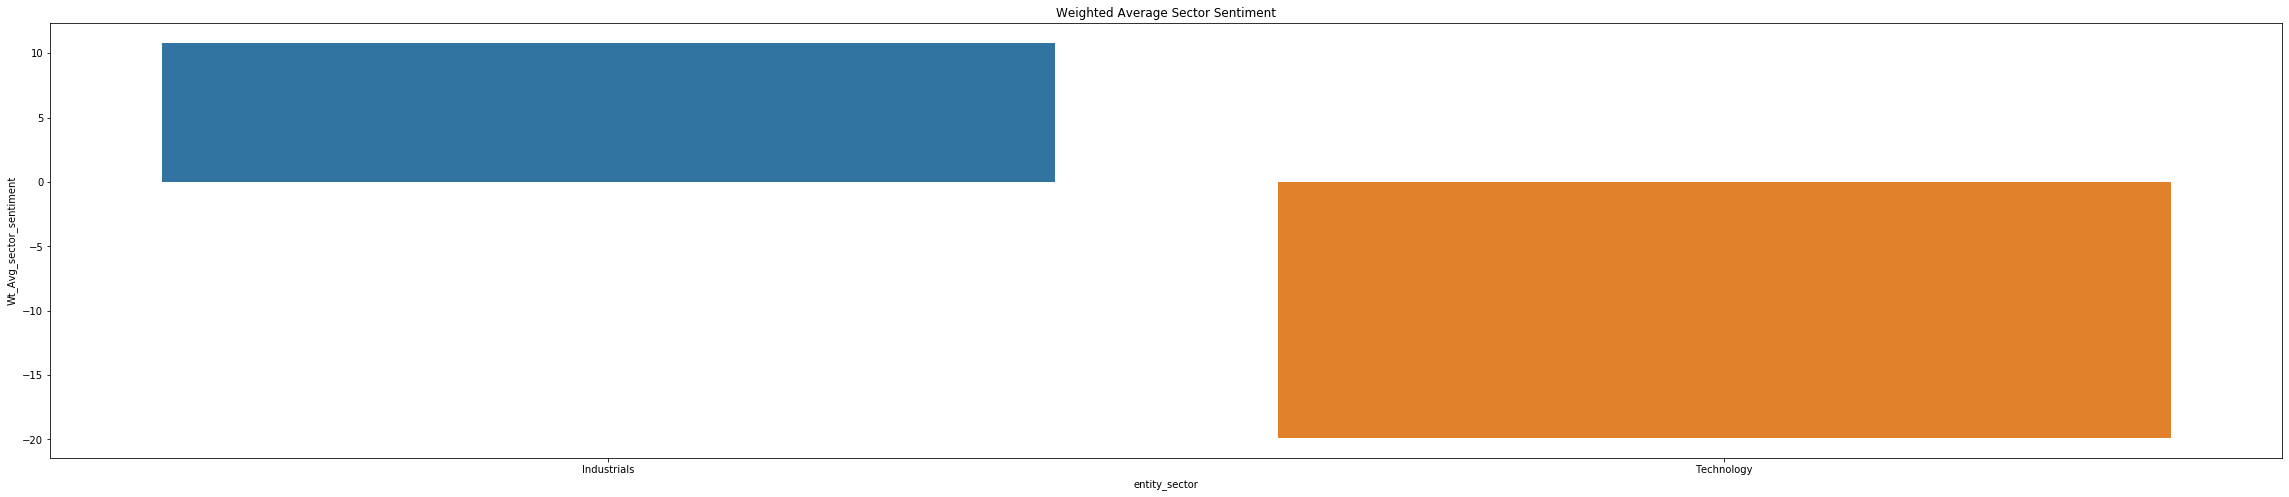

In [150]:
plt.figure(figsize=(40, 8))
plt.title('Weighted Average Sector Sentiment')
sns.barplot(result6['entity_sector'], result6['Wt_Avg_sector_sentiment'])

# KG SetUp<a class="anchor" id="Section_5"></a>

#### Creating  df with AVG Sentiment for each node:<a class="anchor" id="Section_51"></a>

In [151]:
#Entity
entity_name_nodes = temp_data.groupby('entity_name')['entity_sentiment'].mean().reset_index(name = "Avg Entity Sentiment")
#Event
event_nodes = temp_data.groupby('event')['event_sentiment'].mean().reset_index(name = "Avg Event Sentiment")
#Entity Sector
entity_sector_nodes = result6
#Doc title
doc_avg_sentiment = temp_data.groupby('doc_title')['doc_sentiment'].mean().reset_index(name = "Avg Doc Sentiment")

#### Creating nodes from unique df with sentiment

In [152]:
#entity
node_df1 = entity_name_nodes.rename(columns={"entity_name": "node", "Avg Entity Sentiment": "AVG Sentiment"})
#sector 
node_df2 = entity_sector_nodes.rename(columns={"entity_sector": "node", "Wt_Avg_sector_sentiment": "AVG Sentiment"})
#event
node_df3 = event_nodes.rename(columns={"event": "node", "Avg Event Sentiment": "AVG Sentiment"})
#doc 
node_df4 = doc_avg_sentiment.rename(columns={"doc_title": "node", "Avg Doc Sentiment": "AVG Sentiment"})

#### Column to Determine Shapes of Nodes

In [153]:
#entity shape index
node_df1['shape_index'] = 0   #circle

#sector shape index
node_df2['shape_index'] = 5   #triangle up

#doc shape index
node_df4['shape_index'] = 1   #square 

#event shape index

#assigning default value as 3 (#cross)
node_df3['shape_index'] = 3     

#running loop to check E, S or G and assign index respectively 
for i in range(node_df3['node'].shape[0]):
    if node_df3['node'][i].startswith('Environment'):
        node_df3['shape_index'][i] = 3     #cross
    elif node_df3['node'][i].startswith('Social'):
        node_df3['shape_index'][i] = 4     #X
    else:
        node_df3['shape_index'][i] = 17    #star

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [154]:
#combining all df
all_nodes = pd.concat([node_df1,node_df2,node_df3,node_df4])

In [155]:
#binning the sentiments values 
# -100 to -50 --> dark red
# -50 to 0 --> red
# 0 to 50 --> green
# 50 to 100 --> dark green

all_nodes['color'] = np.where(all_nodes['AVG Sentiment'] > 50, 100,
                                                   (np.where(all_nodes['AVG Sentiment'] > 0, 50,
                                                        (np.where(all_nodes['AVG Sentiment'] == 0, 0,
                                                             (np.where(all_nodes['AVG Sentiment'] > -50 , -50,-100)))))))
all_nodes

,node,AVG Sentiment,shape_index,color
0,Apple Inc,-67.91190,0,-100
1,BOMBARDIER INC-A,10.81200,0,50
2,INTL BUSINESS MACHINES CORP,28.12500,0,50
0,Industrials,10.81200,5,50
1,Technology,-19.89345,5,-50
0,Environment - Energy Management - SASB,30.03470,3,50
1,Social - Data Security - SASB,0.15785,4,50
0,Bombardiers joint venture wins contract to bui...,25.05890,1,50
1,"How To: Jailbreak Any iPhone, iPod Touch or iPad",-44.19900,1,-50
2,Print - Bombardiers joint venture wins contrac...,22.31000,1,50


In [156]:
nodes_list=all_nodes['node']
nodes_list

0                                            Apple Inc
1                                     BOMBARDIER INC-A
2                          INTL BUSINESS MACHINES CORP
0                                          Industrials
1                                           Technology
0               Environment - Energy Management - SASB
1                        Social - Data Security - SASB
0    Bombardiers joint venture wins contract to bui...
1     How To: Jailbreak Any iPhone, iPod Touch or iPad
2    Print - Bombardiers joint venture wins contrac...
3     Tech Chiefs Plan to Boost Cybersecurity Spending
Name: node, dtype: object

### Sentiment Filtering

In [172]:
#AND FILTERS based on All Nodes to find specific sentiment ranges
all_nodes = all_nodes[(all_nodes['AVG Sentiment'] >= -30) & (all_nodes['AVG Sentiment']<= 100)]

all_nodes

,node,AVG Sentiment,shape_index,color
1,BOMBARDIER INC-A,10.81200,0,50
2,INTL BUSINESS MACHINES CORP,28.12500,0,50
0,Industrials,10.81200,5,50
1,Technology,-19.89345,5,-50
0,Environment - Energy Management - SASB,30.03470,3,50
1,Social - Data Security - SASB,0.15785,4,50
0,Bombardiers joint venture wins contract to bui...,25.05890,1,50
2,Print - Bombardiers joint venture wins contrac...,22.31000,1,50
3,Tech Chiefs Plan to Boost Cybersecurity Spending,24.46340,1,50


### Graphing

In [158]:
# create empty graph instance
G = nx.Graph()

In [159]:
# add nodes
for i in nodes_list:
    G.add_node(i)

In [160]:
G.nodes()

NodeView(('Apple Inc', 'BOMBARDIER INC-A', 'INTL BUSINESS MACHINES CORP', 'Industrials', 'Technology', 'Environment - Energy Management - SASB', 'Social - Data Security - SASB', 'Bombardiers joint venture wins contract to build 160 new Chinese standard high-speed train cars Toronto Stock Exchange:BBD.A', 'How To: Jailbreak Any iPhone, iPod Touch or iPad', 'Print - Bombardiers joint venture wins contract to build 160 new Chinese standard high-speed train cars', 'Tech Chiefs Plan to Boost Cybersecurity Spending'))

In [161]:
#Creating edge list for relationships
for i,j in temp_data.iterrows():
    G.add_edges_from([(j["event"],j["doc_title"])]) #rls 1
    G.add_edges_from([(j["entity_name"],j["doc_title"])]) #rls 2
    G.add_edges_from([(j["entity_sector"],j["entity_name"])]) #rls 3

In [162]:
# getting positions of each node
pos = nx.spring_layout(G, k=0.5, iterations=50)
pos

{'Apple Inc': array([0.2866768 , 0.50872385]),
 'BOMBARDIER INC-A': array([-0.50050146, -0.8050951 ]),
 'INTL BUSINESS MACHINES CORP': array([0.56868234, 0.74396086]),
 'Industrials': array([-0.67277572, -0.61392921]),
 'Technology': array([0.53975543, 0.52848169]),
 'Environment - Energy Management - SASB': array([-0.12151262, -0.92467809]),
 'Social - Data Security - SASB': array([0.11453422, 0.89799766]),
 'Bombardiers joint venture wins contract to build 160 new Chinese standard high-speed train cars Toronto Stock Exchange:BBD.A': array([-0.34049706, -1.        ]),
 'How To: Jailbreak Any iPhone, iPod Touch or iPad': array([0.08051594, 0.67480606]),
 'Print - Bombardiers joint venture wins contract to build 160 new Chinese standard high-speed train cars': array([-0.27850201, -0.80335416]),
 'Tech Chiefs Plan to Boost Cybersecurity Spending': array([0.32362413, 0.79308643])}

In [163]:
# add positions to graph

for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [164]:
# adding nodes and edges 

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

#### sizing of nodes based on degrees

In [165]:
d = nx.degree(G)
node_sizes = []
for i in d:
    _, value = i
    node_sizes.append(3*value+10)    

#### shapes of nodes based on event_groups

In [166]:
symbols = all_nodes['shape_index']

## adding everything together

In [167]:
#adjusting colour scale
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    marker_symbol = symbols,
    marker_line_color="black", 
    marker_line_width=2,
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale=#based on max-min
                    [[0,"rgb(227,26,28)"], #red
                    [0.5,"rgb(250,250,250)"], #white
                   [1,"rgb(51,160,44)"]], #green
        reversescale=False,
        color=all_nodes['color'],
        size=node_sizes,
        colorbar=dict(
            thickness=10,
            title='Sentiment Range',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

#### hover info<a class="anchor" id="Section_52"></a>

In [168]:
#colour based on adjancecy --> Loan to update
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    print(adjacencies[0])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

Apple Inc
BOMBARDIER INC-A
INTL BUSINESS MACHINES CORP
Industrials
Technology
Environment - Energy Management - SASB
Social - Data Security - SASB
Bombardiers joint venture wins contract to build 160 new Chinese standard high-speed train cars Toronto Stock Exchange:BBD.A
How To: Jailbreak Any iPhone, iPod Touch or iPad
Print - Bombardiers joint venture wins contract to build 160 new Chinese standard high-speed train cars
Tech Chiefs Plan to Boost Cybersecurity Spending


## Plotting

In [169]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>ESG KG',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Hello ESG Analyst? How you doing?",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

In [170]:
print("Nodes to be shown =", temp_data.entity_name.nunique()+temp_data.entity_sector.nunique()+temp_data.event.nunique()+temp_data.doc_title.nunique(),
      "\n > entity_name:", temp_data.entity_name.nunique()
     ,"\n > entity_sector:", temp_data.entity_sector.nunique()
     ,"\n > event_group:", temp_data.event_group.nunique()
     ,"\n > doc_title:", temp_data.doc_title.nunique())


temp_data[["entity_name", "entity_sector","event_group","event","doc_title"]]

Nodes to be shown = 11 
 > entity_name: 3 
 > entity_sector: 2 
 > event_group: 2 
 > doc_title: 4


,entity_name,entity_sector,event_group,event,doc_title
0,BOMBARDIER INC-A,Industrials,Environment,Environment - Energy Management - SASB,Print - Bombardiers joint venture wins contrac...
1,BOMBARDIER INC-A,Industrials,Environment,Environment - Energy Management - SASB,Bombardiers joint venture wins contract to bui...
2,Apple Inc,Technology,Social,Social - Data Security - SASB,"How To: Jailbreak Any iPhone, iPod Touch or iPad"
3,INTL BUSINESS MACHINES CORP,Technology,Social,Social - Data Security - SASB,Tech Chiefs Plan to Boost Cybersecurity Spending
